# Практикум 3: высокопроизводительные вычисления и научные пакеты: numpy, pandas, scipy, matplotlib
## [Ссылка на неизменяемую версию практикума](https://github.com/glebdovzhenko/PythonCourse01/blob/main/Prakt3.ipynb)

Поскольку Python это высокоуровневый язык программирования со сборщиком мусора, runtime-проверками и прочими удобствами, высокопроизводительные вычисления с его помощью работают сравнительно медленно.
Чтобы обойти это ограничение по скорости, были созданы библиотеки numpy и scipy, реализующие работу с C-образными массивами (более быстрыми и эффективными по памяти но менее удобными) непосредственно из Python.

## Пример более высокопроизводительной работы

В следующих двух ячейках приведен пример поэлементного перемножения массивов. В первой ячейке используются списки из стандартной библиотеки, во второй массивы библиотеки numpy. Команда `%timeit` выполняет операцию следующую за ней несколько раз и замеряет среднее время исполнения.

Также посмотрите [что делает функция zip](https://www.programiz.com/python-programming/methods/built-in/zip).

Для высокопроизводительных вычислений пакет `numpy` работает на один или несколько порядков быстрее.

In [1]:
l1 = [a ** 2 for a in range(1000)]
l2 = [a ** 3 for a in range(1000)]

l3 = []
%timeit for x, y in zip(l1, l2): l3.append(x * y)

79.7 µs ± 4.88 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [2]:
import numpy as np
l1 = np.array(l1)
l2 = np.array(l2)

%timeit l3 = l1 * l2

899 ns ± 35.4 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


## Работа с numpy

In [3]:
# создание массивов
a1 = np.array([1, 2, 3])  # из списков
a2 = np.arange(0, 9., 1.5)  # c помощью функции arange(минимальное значение, максимальное значение, шаг)
a3 = np.linspace(0, 9., 5)  # c помощью функции linspace(минимальное значение, максимальное значение, количество точек)
print(a1, a2, a3)

[1 2 3] [0.  1.5 3.  4.5 6.  7.5] [0.   2.25 4.5  6.75 9.  ]


In [4]:
# операции с массивами
# максимальное ускорение numpy возникает когда операции выполняются «векторно», т.е. одна и та же операция делается параллельно на большом массиве данных
# поэтому с массивами numpy можно обращаться как с числами: складывать, умножать (если совпадают их размеры),
# вычислять поэлементно алгебраические функции от них и тд.

xs = np.linspace(0, 1, 10)  # массив из 10 равноудаленных друг от друга точек на отрезке с 0 до 1
ys = 4. * xs + 5.  # обе операции, сложение и умножение выполняются ПОЭЛЕМЕНТНО

print(xs)
print(ys)

[0.         0.11111111 0.22222222 0.33333333 0.44444444 0.55555556
 0.66666667 0.77777778 0.88888889 1.        ]
[5.         5.44444444 5.88888889 6.33333333 6.77777778 7.22222222
 7.66666667 8.11111111 8.55555556 9.        ]


## Выборки из numpy-массивов

In [5]:
# с numpy-массивами работают срезы так же как и со списками, строками и другими стандартными классами Python
# индексы так же идут с 0
a1 = np.array([11, 22, 33, 44, 55, 66])
print(a1)
print(a1[5], a1[-1])  # доступ к элементам массива по индексу
print(a1[2:4])  # срез массива со второго элемента (включительно) по 4 (исключительно)
print(a1[0:-1:2])  # срез массива с нулевого элемента (включительно) по последний (исключительно) с шагом 2 (т.е. через один)
print(a1[1::2])  # срез массива с первого элемента (включительно) с шагом 2 (т.е. через один)

[11 22 33 44 55 66]
66 66
[33 44]
[11 33 55]
[22 44 66]


In [6]:
# кроме того, из numpy-массивов можно делать выборки поэлементно
a1 = np.array([11, 22, 33, 44, 55, 66])  # создаём исходный массив
# создаём список или массив того же размера (!) из логических переменных 
# этот массив указывает будем мы выбирать соответствующий элемент первого массива или нет
ii = [True, True, False, False, True, True]  

print(a1)
print(ii)
print(a1[ii])

[11 22 33 44 55 66]
[True, True, False, False, True, True]
[11 22 55 66]


## Построение графиков. Пакет matplotlib

100 100


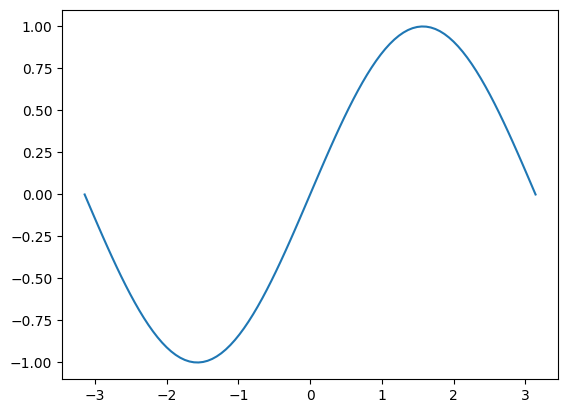

In [7]:
from matplotlib import pyplot as plt
import numpy as np

# создаём вектор значений координаты x. np.linspace(минимальное значение, максимальное значение, количество точек)
xs = np.linspace(-np.pi, np.pi, 100)  
# рассчитываем значение координат y.
ys = np.sin(xs)

# печатаем размеры массивов. для построения графиков они должны быть одинакового размера, т.к. у каждой точки должны быть заданы координаты x и y
print(len(xs), len(ys))

# вызов plt.plot автоматически создаёт фигуру, сетку координат и выводит на них кривую
plt.plot(xs, ys)
# plt.show показывает фигуру. альтернативно можно сохранить график в виде изображения png/pdf/jpeg с помощью plt.savefig
plt.show()

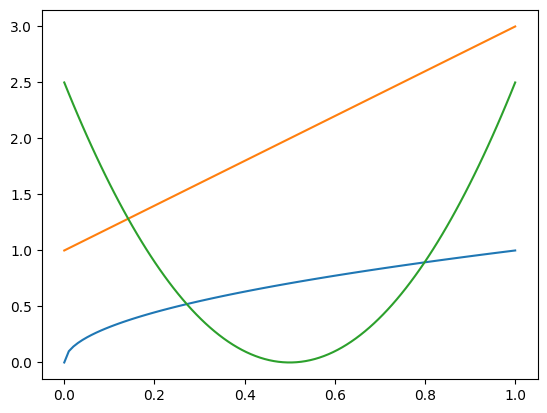

In [8]:
from matplotlib import pyplot as plt
import numpy as np

# чтобы построить несколько графиков на одной фигуре, можно вызвать функцию plot несколько раз

xs = np.linspace(0, 1, 100)

plt.plot(xs, np.sqrt(xs))  # синяя линия
plt.plot(xs, 2. * xs + 1.)  # оранжевая линия
plt.plot(xs, 10. * (xs - .5)**2)  # зеленая линия

plt.show()

[ True  True  True  True  True  True  True  True  True False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False  True  True  True  True  True
  True  True  True  True]


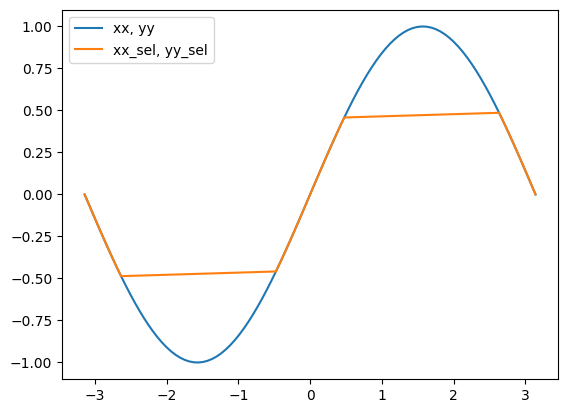

In [9]:
# если есть два или более массивов одного размера, из них можно делать параллельные выборки
# например, есть набор координат x
xx = np.linspace(-np.pi, np.pi, 100)
# и набор координат y = sin x
yy = np.sin(xx)
# и нам нужно оставить только те координаты, при которых -0.5 < y < 0.5
# для этого создаём массив логических переменных, которые показывают, находится y в заданном диапазоне или нет
cond = (yy < .5) & (yy > -.5)  # & это оператор логического «и», его результат True только если оба условия должны выполняются одновременно
# видим что это массив логических переменных
print(cond)
# и делаем выборку
xx_sel = xx[cond]
yy_sel = yy[cond]

# посмотрим что получилось с помощью графика:
plt.plot(xx, yy, label='xx, yy')
plt.plot(xx_sel, yy_sel, label='xx_sel, yy_sel')
plt.legend()  # если при построении кривых у них заданы названия — label, можно вызвать функцию plt.legend() и она расположит легенду на графике
plt.show()

### Задача 1

In [10]:
# постройте график функции y = x**3 (x в третьей степени) в диапазоне по y -100 < y < 250
# здесь будет ваш код

### Задача 2

In [11]:
# постройте график функции y = sin(x) в диапазоне -20 < x < 20 в тех областях, где x**2 > 50
# чтобы у функции появился визуальный разрыв, используйте построение графика точками без линии, например так: plt.plot(xs, ys, '.')
# здесь будет ваш код

### Задача 3

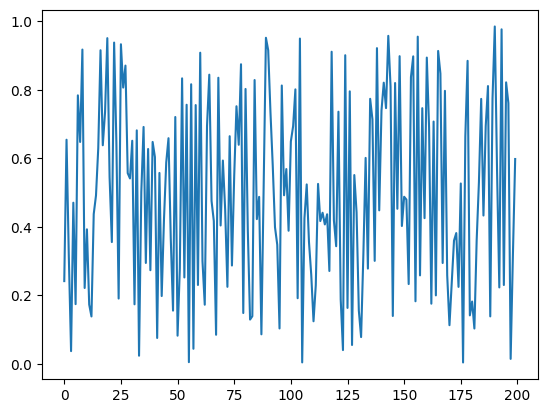

In [12]:
# дан вектор из 200 случайных чисел равномерно распределенных с 0 до 1
dd = np.random.rand(200)
plt.plot(dd) # если просто вывести на график одномерный массив, matplotlib автоматически подставит вместо координаты x индекс массива
# выберите из dd только те числа, которые отличаются от среднего значения вектора (np.mean) не более чем на одно стандартное отклонение (np.std)
# постройте результат на графике
# здесь будет ваш код

### Задача 4

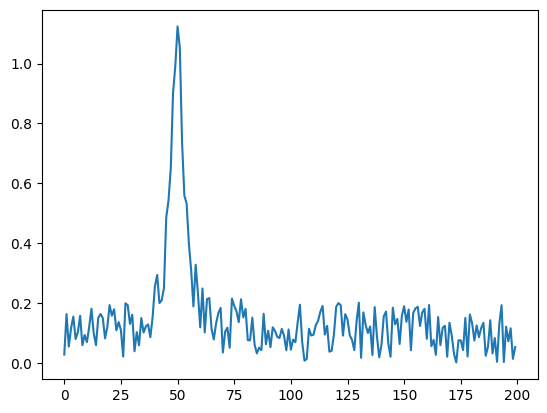

In [13]:
# есть сигнал состоящий из информации и шума
ts = np.arange(200)
sig = 10/((-50+ts)**2 + 10) + .2 * np.random.rand(ts.size)
plt.plot(ts, sig)
# выберите область сигнала где присутствует только шум, найдите его среднее значение и вычтите его из сигнала. постройте результат на графике 

### Задача 5
Найдите интеграл заданной функции [методом трапеций](https://ru.wikipedia.org/wiki/%D0%9C%D0%B5%D1%82%D0%BE%D0%B4_%D1%82%D1%80%D0%B0%D0%BF%D0%B5%D1%86%D0%B8%D0%B9)

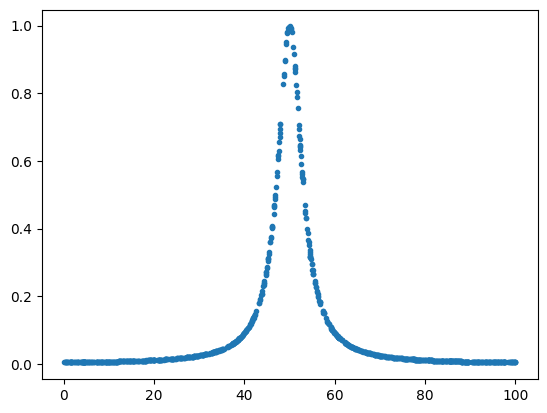

In [14]:
# Задана функция
n_pts = 1000  # количество отсчётов функции
xx = np.sort(np.random.rand(n_pts)) * 100  # задаём вектор координат x из случайно распределенных
yy = 10/((-50+xx)**2 + 10)
plt.plot(xx, yy, '.')

# чтобы проинтегрировать функцию заданную набором точек методом трапеций, нужно сделать следующее
# 1. создать массив правых границ трапеций, массив значений функции на правых границах трапеций
# 2. создать массив левых границ трапеций, массив значений функции на левых границах трапеций
# 3. сосчитать из этих четырех массивов массив площадей трапеций
# 4. сосчитать сумму элементов массива площадей трапеций
# 5. сравнить результат с площадью вычисленной по формуле 2. * np.sqrt(10) * np.arctan(5 * np.sqrt(10)). посмотреть как результат зависит от числа точек n_pts
